# Binary Classification

In [ ]:
%load_ext autoreload

In [40]:
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import plot_importance

from lib import data

pd.options.display.max_columns = None
sns.set()

In [63]:
def get_datasets():
    X_train, y_train, X_test = data.get_classification_datasets()
    X_train = X_train.drop(['Study', 'Country', 'SiteID', 'RaterID', 'TxGroup'], axis=1)
    X_test = X_test.drop(['Study', 'Country', 'SiteID', 'RaterID', 'TxGroup'], axis=1)
    
    return X_train, y_train, X_test

In [64]:
X_train, y_train, X_test = get_datasets()
X_train.head()

,PatientID,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,PositiveScore,NegativeScore,GeneralScore,CompositeScore,Control,Treatment,PANSS_TotalDelta,baseline_P1,baseline_P2,baseline_P3,baseline_P4,baseline_P5,baseline_P6,baseline_P7,baseline_N1,baseline_N2,baseline_N3,baseline_N4,baseline_N5,baseline_N6,baseline_N7,baseline_G1,baseline_G2,baseline_G3,baseline_G4,baseline_G5,baseline_G6,baseline_G7,baseline_G8,baseline_G9,baseline_G10,baseline_G11,baseline_G12,baseline_G13,baseline_G14,baseline_G15,baseline_G16,baseline_Control,baseline_Treatment
AssessmentiD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100679,10001,0,5,5,5,3,4,5,3,4,4,3,4,4,3,2,3,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,107,30,24,53,6,True,False,0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,0.0
101017,10001,11,5,5,5,3,4,5,3,4,4,3,4,4,3,3,4,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,109,30,25,54,5,True,False,2,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,0.0
102177,10001,18,4,4,4,3,2,4,2,4,4,3,4,4,3,2,3,3,3,3,1,4,2,2,4,2,2,3,3,2,3,4,91,23,24,44,-1,True,False,-16,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,0.0
101533,10001,25,3,3,3,2,2,4,2,4,4,2,4,4,2,2,3,3,2,2,1,2,2,2,3,2,2,3,3,2,3,4,80,19,22,39,-3,True,False,-27,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,0.0
100930,10001,39,3,3,4,2,1,4,2,4,4,2,4,4,1,2,3,3,1,2,1,1,2,2,3,2,2,3,3,2,3,4,77,19,21,37,-2,True,False,-30,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,0.0


In [24]:
y_train.head()

AssessmentiD
100679    1
101017    1
102177    0
101533    1
100930    1
Name: LeadStatus, dtype: int64

In [25]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Uncomment this to use a resampled dataset.
X_train, y_train = data.get_resampled_dataset(X_train, y_train)

In [27]:
sum(y_train) / len(y_train)

0.5

In [28]:
def evaluate_model(clf, X, y):
    y_prob = clf.predict_proba(X)
    y_pred = clf.predict(X)
    
    print(f"True label percentage: {sum(y) / len(y_prob)}")
    print(f"Predicted label percentage: {sum(y_pred) / len(y_prob)}")
    print(f"Log loss: {log_loss(y, y_prob)}")
    
    cm = confusion_matrix(y, y_pred)    
    print(cm)

## Logistic Regression

In [29]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/kvchen/Library/Caches/pypoetry/virtualenvs/proj-kJ_hafaH-py3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
sum(y_train) / len(y_train)

0.5

In [31]:
sum(clf.predict(X_train)) / len(y_train)

0.5033860933931805

In [32]:
log_loss(y_train, clf.predict_proba(X_train))

0.5808923209941779

In [33]:
log_loss(y_val, clf.predict_proba(X_val))

0.5915255276797639

## SVM

In [44]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)

/Users/kvchen/Library/Caches/pypoetry/virtualenvs/proj-kJ_hafaH-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
train_pred = clf.predict_proba(X_train)
val_pred = clf.predict_proba(X_val)

In [48]:
log_loss(y_train, train_pred)

0.0073677377514854234

In [49]:
sum(train_pred) / len(y_train)

array([0.49811617, 0.50188383])

In [51]:
log_loss(y_val, val_pred)

0.5059614751499677

In [ ]:
sum(train_val) / len(y_val)

In [13]:
#clf.score(X_test, y_test)

## Multi-Layer Perceptron

In [97]:
clf = MLPClassifier(solver='adam', learning_rate="adaptive", hidden_layer_sizes=(128,), max_iter=400, early_stopping=False)
clf.fit(X_train.drop('PatientID', axis=1), y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0.5, 0, 'Epochs')

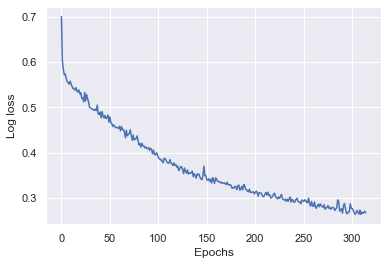

In [98]:
plt.plot(clf.loss_curve_)
plt.ylabel('Log loss')
plt.xlabel('Epochs')

In [105]:
pred_train = clf.predict(X_train.drop('PatientID', axis=1))
pred_val = clf.predict(X_val.drop('PatientID', axis=1))

print(sum(pred_train) / len(y_train))
print(sum(y_train) / len(y_train))

0.5638768258981445
0.5


In [107]:
confusion_matrix(y_train, pred_train)

array([[10313,  2352],
       [  734, 11931]])

In [109]:
confusion_matrix(y_val, pred_val)

array([[2366,  810],
       [ 288,  726]])

In [110]:
log_loss(y_train, clf.predict_proba(X_train.drop('PatientID', axis=1)))

0.2794481117338447

In [112]:
log_loss(y_val, clf.predict_proba(X_val.drop('PatientID', axis=1)))

0.6135591218654912

## XGBoost

In [114]:
X_train, y_train, _ = data.get_classification_datasets()
X_train = X_train.drop(['Study', 'Country', 'SiteID', 'RaterID', 'TxGroup'], axis=1)
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
eval_set = [(X_train, y_train), (X_val, y_val)]

In [115]:
params = {
    'max_depth': 4,
    'gamma': 2,
    'objective': 'binary:logistic',
    'n_estimators': 800,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'scale_pos_weight': scale_pos_weight
}

In [116]:
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.1024285154719937,
              seed=None, silent=None, subsample=0.8, verbosity=1)

Text(0.5, 0, 'Estimators')

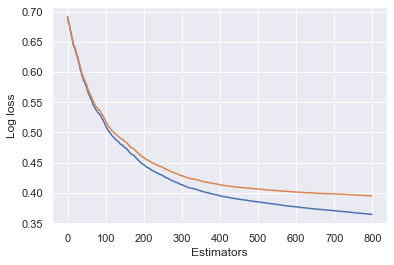

In [118]:
results = clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(epochs)

fig, ax = plt.subplots()
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')

plt.ylabel('Log loss')
plt.xlabel('Estimators')

In [60]:
evaluate_model(clf, X_train, y_train)
evaluate_model(clf, X_val, y_val)

True label percentage: 0.24139165721787909
Predicted label percentage: 0.28519424718028286
Log loss: 0.36479034876199573
[[11139  1573]
 [  839  3206]]
True label percentage: 0.25322195704057276
Predicted label percentage: 0.2821002386634845
Log loss: 0.3882619248189672
[[2748  381]
 [ 260  801]]


In [61]:
pd.DataFrame({
    'Variable':X_train.columns,
    'Importance':clf.feature_importances_
}).sort_values('Importance', ascending=False).head()

,Variable,Importance
0,PatientID,0.160938
65,baseline_G12,0.068565
42,baseline_P3,0.039999
46,baseline_P7,0.033641
67,baseline_G14,0.025438


## Final Model

In [119]:
X_train, y_train, X_test = get_datasets()

In [120]:
clf = xgb.XGBClassifier(**params)
clf.fit(X_train.drop('PatientID', axis=1), y_train, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.1024285154719937,
              seed=None, silent=None, subsample=0.8, verbosity=1)

In [121]:
pd.DataFrame({
    'Variable':X_train.drop('PatientID', axis=1).columns,
    'Importance':clf.feature_importances_
}).sort_values('Importance', ascending=False).head()

,Variable,Importance
64,baseline_G12,0.072939
45,baseline_P7,0.040742
41,baseline_P3,0.037259
39,baseline_P1,0.033320
60,baseline_G8,0.029330


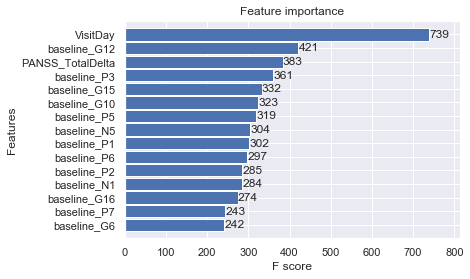

In [122]:
xgb.plot_importance(clf, height=0.9, max_num_features=15)

In [83]:
pred = pd.DataFrame({
    'LeadStatus': clf.predict_proba(X_test.drop('PatientID', axis=1))[:, 1],
}, index=X_test.index,)
pred.index.names = ['AssessmentID']

In [85]:
sum(pred.LeadStatus > 0.5) / len(pred)

0.08970438328236494

In [86]:
pred.to_csv('submission/status.csv')